# Deep Learning with PyTorch and Iris datasets


###  Building a simple neural network

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
from data import iris

### Let's do a head on the raw file

In [2]:
!head data/iris.data.txt

sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


### Create the Fully Connected Feed Forward Neural Network

**Create the module**

In [3]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

**Print the module**

In [4]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


### Create the DataLoader

In [5]:
batch_size = 60
iris_data_file = 'data/iris.data.txt'

In [6]:
# Get the datasets
train_ds, test_ds = iris.get_datasets(iris_data_file)

# How many instances have we got?
print('# instances in training set: ', len(train_ds))
print('# instances in testing/validation set: ', len(test_ds))

# Create the dataloaders - for training and validation/testing
# We will be using the term validation and testing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


### Instantiate the network, the loss function and the optimizer

In [7]:
# Our model
net = IrisNet(4, 100, 50, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)  

### Train it!

In [8]:
num_epochs = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        items = Variable(items)
        classes = Variable(classes)
        
        net.train()           # Put the network into training mode
        
        optimizer.zero_grad() # Clear off the gradients from any past operation
        outputs = net(items)  # Do the forward pass
        loss = criterion(outputs, classes) # Calculate the loss
        loss.backward()       # Calculate the gradients with help of back propagation
        optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.data.item()))

    net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
    train_loss.append(loss.data.item())

    # What was our train accuracy?
    train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])

    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data.item())
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

Epoch 1/500, Iteration 1/2, Loss: 1.0961
Epoch 1/500, Iteration 2/2, Loss: 1.1028
Epoch 2/500, Iteration 1/2, Loss: 1.1016
Epoch 2/500, Iteration 2/2, Loss: 1.0624
Epoch 3/500, Iteration 1/2, Loss: 1.0707
Epoch 3/500, Iteration 2/2, Loss: 1.0425
Epoch 4/500, Iteration 1/2, Loss: 1.0372
Epoch 4/500, Iteration 2/2, Loss: 1.0139
Epoch 5/500, Iteration 1/2, Loss: 1.0032
Epoch 5/500, Iteration 2/2, Loss: 0.9899
Epoch 6/500, Iteration 1/2, Loss: 1.0008
Epoch 6/500, Iteration 2/2, Loss: 0.9400
Epoch 7/500, Iteration 1/2, Loss: 0.9427
Epoch 7/500, Iteration 2/2, Loss: 0.9435
Epoch 8/500, Iteration 1/2, Loss: 0.9228
Epoch 8/500, Iteration 2/2, Loss: 0.9133
Epoch 9/500, Iteration 1/2, Loss: 0.8965
Epoch 9/500, Iteration 2/2, Loss: 0.8946
Epoch 10/500, Iteration 1/2, Loss: 0.8806
Epoch 10/500, Iteration 2/2, Loss: 0.8675
Epoch 11/500, Iteration 1/2, Loss: 0.8449
Epoch 11/500, Iteration 2/2, Loss: 0.8595
Epoch 12/500, Iteration 1/2, Loss: 0.8442
Epoch 12/500, Iteration 2/2, Loss: 0.8196
Epoch 13/5

Epoch 102/500, Iteration 1/2, Loss: 0.3357
Epoch 102/500, Iteration 2/2, Loss: 0.3048
Epoch 103/500, Iteration 1/2, Loss: 0.3048
Epoch 103/500, Iteration 2/2, Loss: 0.3319
Epoch 104/500, Iteration 1/2, Loss: 0.2685
Epoch 104/500, Iteration 2/2, Loss: 0.3626
Epoch 105/500, Iteration 1/2, Loss: 0.3051
Epoch 105/500, Iteration 2/2, Loss: 0.3218
Epoch 106/500, Iteration 1/2, Loss: 0.3511
Epoch 106/500, Iteration 2/2, Loss: 0.2711
Epoch 107/500, Iteration 1/2, Loss: 0.2993
Epoch 107/500, Iteration 2/2, Loss: 0.3192
Epoch 108/500, Iteration 1/2, Loss: 0.3273
Epoch 108/500, Iteration 2/2, Loss: 0.2861
Epoch 109/500, Iteration 1/2, Loss: 0.3238
Epoch 109/500, Iteration 2/2, Loss: 0.2854
Epoch 110/500, Iteration 1/2, Loss: 0.2866
Epoch 110/500, Iteration 2/2, Loss: 0.3180
Epoch 111/500, Iteration 1/2, Loss: 0.3006
Epoch 111/500, Iteration 2/2, Loss: 0.3004
Epoch 112/500, Iteration 1/2, Loss: 0.2736
Epoch 112/500, Iteration 2/2, Loss: 0.3233
Epoch 113/500, Iteration 1/2, Loss: 0.2829
Epoch 113/5

Epoch 209/500, Iteration 2/2, Loss: 0.1738
Epoch 210/500, Iteration 1/2, Loss: 0.1615
Epoch 210/500, Iteration 2/2, Loss: 0.1698
Epoch 211/500, Iteration 1/2, Loss: 0.1366
Epoch 211/500, Iteration 2/2, Loss: 0.1924
Epoch 212/500, Iteration 1/2, Loss: 0.1819
Epoch 212/500, Iteration 2/2, Loss: 0.1470
Epoch 213/500, Iteration 1/2, Loss: 0.1483
Epoch 213/500, Iteration 2/2, Loss: 0.1778
Epoch 214/500, Iteration 1/2, Loss: 0.1647
Epoch 214/500, Iteration 2/2, Loss: 0.1599
Epoch 215/500, Iteration 1/2, Loss: 0.1278
Epoch 215/500, Iteration 2/2, Loss: 0.1955
Epoch 216/500, Iteration 1/2, Loss: 0.1235
Epoch 216/500, Iteration 2/2, Loss: 0.1983
Epoch 217/500, Iteration 1/2, Loss: 0.1889
Epoch 217/500, Iteration 2/2, Loss: 0.1315
Epoch 218/500, Iteration 1/2, Loss: 0.1526
Epoch 218/500, Iteration 2/2, Loss: 0.1664
Epoch 219/500, Iteration 1/2, Loss: 0.1815
Epoch 219/500, Iteration 2/2, Loss: 0.1374
Epoch 220/500, Iteration 1/2, Loss: 0.1675
Epoch 220/500, Iteration 2/2, Loss: 0.1495
Epoch 221/5

Epoch 311/500, Iteration 2/2, Loss: 0.1035
Epoch 312/500, Iteration 1/2, Loss: 0.1191
Epoch 312/500, Iteration 2/2, Loss: 0.1161
Epoch 313/500, Iteration 1/2, Loss: 0.1019
Epoch 313/500, Iteration 2/2, Loss: 0.1322
Epoch 314/500, Iteration 1/2, Loss: 0.1220
Epoch 314/500, Iteration 2/2, Loss: 0.1117
Epoch 315/500, Iteration 1/2, Loss: 0.1012
Epoch 315/500, Iteration 2/2, Loss: 0.1319
Epoch 316/500, Iteration 1/2, Loss: 0.1362
Epoch 316/500, Iteration 2/2, Loss: 0.0989
Epoch 317/500, Iteration 1/2, Loss: 0.0958
Epoch 317/500, Iteration 2/2, Loss: 0.1364
Epoch 318/500, Iteration 1/2, Loss: 0.1251
Epoch 318/500, Iteration 2/2, Loss: 0.1062
Epoch 319/500, Iteration 1/2, Loss: 0.1184
Epoch 319/500, Iteration 2/2, Loss: 0.1138
Epoch 320/500, Iteration 1/2, Loss: 0.1449
Epoch 320/500, Iteration 2/2, Loss: 0.0861
Epoch 321/500, Iteration 1/2, Loss: 0.1151
Epoch 321/500, Iteration 2/2, Loss: 0.1150
Epoch 322/500, Iteration 1/2, Loss: 0.0879
Epoch 322/500, Iteration 2/2, Loss: 0.1426
Epoch 323/5

Epoch 410/500, Iteration 2/2, Loss: 0.0988
Epoch 411/500, Iteration 1/2, Loss: 0.1279
Epoch 411/500, Iteration 2/2, Loss: 0.0672
Epoch 412/500, Iteration 1/2, Loss: 0.0786
Epoch 412/500, Iteration 2/2, Loss: 0.1163
Epoch 413/500, Iteration 1/2, Loss: 0.0849
Epoch 413/500, Iteration 2/2, Loss: 0.1097
Epoch 414/500, Iteration 1/2, Loss: 0.0525
Epoch 414/500, Iteration 2/2, Loss: 0.1422
Epoch 415/500, Iteration 1/2, Loss: 0.0957
Epoch 415/500, Iteration 2/2, Loss: 0.0984
Epoch 416/500, Iteration 1/2, Loss: 0.0908
Epoch 416/500, Iteration 2/2, Loss: 0.1040
Epoch 417/500, Iteration 1/2, Loss: 0.1050
Epoch 417/500, Iteration 2/2, Loss: 0.0886
Epoch 418/500, Iteration 1/2, Loss: 0.1231
Epoch 418/500, Iteration 2/2, Loss: 0.0710
Epoch 419/500, Iteration 1/2, Loss: 0.1003
Epoch 419/500, Iteration 2/2, Loss: 0.0929
Epoch 420/500, Iteration 1/2, Loss: 0.1318
Epoch 420/500, Iteration 2/2, Loss: 0.0616
Epoch 421/500, Iteration 1/2, Loss: 0.1236
Epoch 421/500, Iteration 2/2, Loss: 0.0695
Epoch 422/5

Plot loss vs iterations

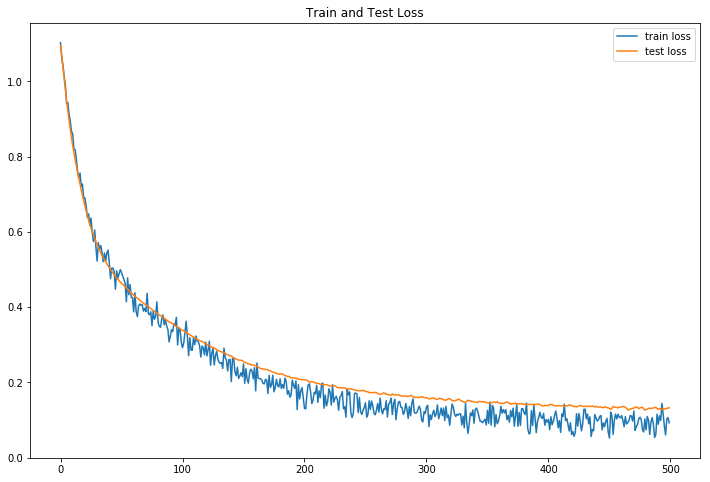

In [9]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

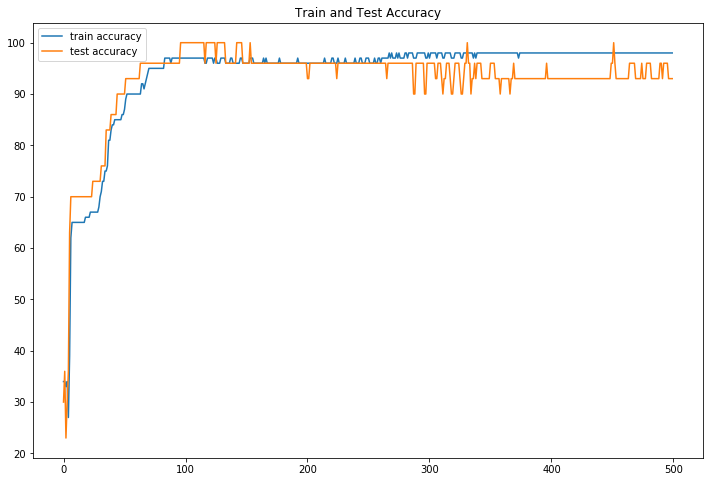

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title("Train and Test Accuracy")
plt.legend()
plt.show()

### Savign the model to disk, and loading it back

In [11]:
torch.save(net.state_dict(), "./2.model.pth")

In [12]:
net2 = IrisNet(4, 100, 50, 3)
net2.load_state_dict(torch.load("./2.model.pth"))

Now we can predict 

In [13]:
item = [[5.1, 3.5, 1.4, 0.2]]
expected_class = 0

In [14]:
output = net2(Variable(torch.FloatTensor([[5.1, 3.5, 1.4, 0.2]])))

In [15]:
_, predicted_class = torch.max(output.data, 1)
print('Predicted class: ', predicted_class.numpy()[0])
print('Expected class: ', 0 )

Predicted class:  0
Expected class:  0
